In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


### Function

In [2]:
#TODO: Define function
@tf.function
def f(x,y):
  return x*y

### Minmax game

In [3]:
#TODO: Implement gradient ascend/descend for variables x and y
def play_min_max_game(n_iter):
  x_array=[]
  y_array=[]
  f_array = []
  x = tf.Variable(1.0)
  y = tf.Variable(1.0)
  iter = []
  lr = 0.1

  sgd = tf.optimizers.SGD(learning_rate=lr)

  for i in range(n_iter):
    x_array.append(x.numpy())
    y_array.append(y.numpy())
    with tf.GradientTape(persistent=True) as tape:
      res = f(x,y)
    
    grad_x = tape.gradient(res,x)
    grad_y = tape.gradient(res,y)

    #update X and Y
    sgd.apply_gradients(zip([grad_x, -grad_y], [x, y]))
    ## Or do it mannualy
    # x.assign(x -lr * grad_x)
    # y.assign(y + lr * grad_y)

    f_array.append(res.numpy())
    iter.append(i)
  plt.plot(np.array(iter),np.array(x_array))
  plt.plot(np.array(iter),np.array(y_array))
  plt.plot(np.array(iter),np.array(f_array))
  plt.legend(('x','y','f'))
  plt.title('Minmax game, f(x,y) = x*y')  




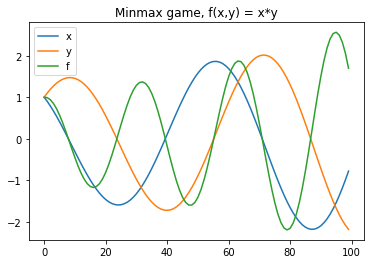

In [4]:
 play_min_max_game(100)

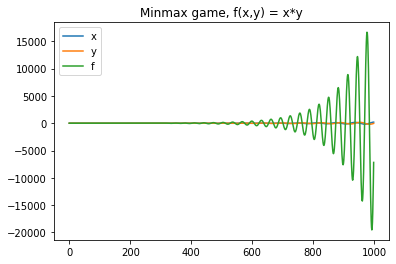

In [5]:
play_min_max_game(1000)